# Unsupervised ML - PCA Data Mining

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
# Import Dataset
univ=pd.read_csv('Database/Universities.csv')
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [3]:
# Consider only numerical data
univ2=univ.iloc[:,1:]
univ2

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [4]:
# Converting data to numpy array
univ_ary=univ2.values
univ_ary

array([[ 1310,    89,    22,    13, 22704,    94],
       [ 1415,   100,    25,     6, 63575,    81],
       [ 1260,    62,    59,     9, 25026,    72],
       [ 1310,    76,    24,    12, 31510,    88],
       [ 1280,    83,    33,    13, 21864,    90],
       [ 1340,    89,    23,    10, 32162,    95],
       [ 1315,    90,    30,    12, 31585,    95],
       [ 1255,    74,    24,    12, 20126,    92],
       [ 1400,    91,    14,    11, 39525,    97],
       [ 1305,    75,    44,     7, 58691,    87],
       [ 1380,    94,    30,    10, 34870,    91],
       [ 1260,    85,    39,    11, 28052,    89],
       [ 1255,    81,    42,    13, 15122,    94],
       [ 1081,    38,    54,    18, 10185,    80],
       [ 1375,    91,    14,     8, 30220,    95],
       [ 1005,    28,    90,    19,  9066,    69],
       [ 1360,    90,    20,    12, 36450,    93],
       [ 1075,    49,    67,    25,  8704,    67],
       [ 1240,    95,    40,    17, 15140,    78],
       [ 1290,    75,    50,   

In [5]:
# Normalizing the numerical data 
univ_norm=scale(univ_ary)
univ_norm

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

## PCA Implementation

In [6]:
# Applying PCA Fit Transform to dataset

pca=PCA(n_components=6)  # n_components is no. of features

univ_pca=pca.fit_transform(univ_norm)
univ_pca

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

In [7]:
# PCA Components matrix or covariance Matrix
pca.components_

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

In [8]:
# The amount of variance that each PCA has
var=pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [9]:
# Cummulative variance of each PCA
var1 = np.cumsum(np.round(var,4)*100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

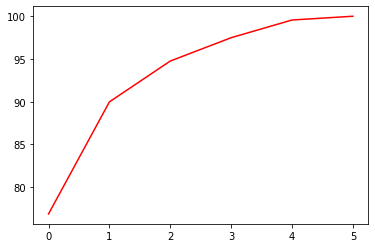

In [10]:
# Variance plot for PCA components obtained 
plt.plot(var1,color='red')

In [11]:
# Final Dataframe
final_df=pd.concat([univ['Univ'],pd.DataFrame(univ_pca[:,0:2],columns=['PC1','PC2'])],axis=1)
final_df

,Univ,PC1,PC2
0,Brown,-1.009874,-1.064310
1,CalTech,-2.822238,2.259045
2,CMU,1.112466,1.631209
3,Columbia,-0.741741,-0.042187
4,Cornell,-0.311912,-0.635244
5,Dartmouth,-1.696691,-0.344363
6,Duke,-1.246821,-0.490984
7,Georgetown,-0.338750,-0.785169
8,Harvard,-2.374150,-0.386539
9,JohnsHopkins,-1.403277,2.119515


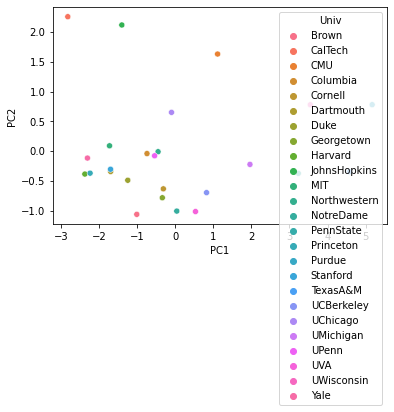

In [12]:
# Visualization of PCAs
sns.scatterplot(data=final_df,x='PC1',y='PC2',hue='Univ')

In [13]:
#### OPTIONAL STEPS ####

In [14]:
#How to compute Eigen vector and eigen values for a given matrix

In [15]:
import scipy.linalg as la

In [16]:
# Suppose the given matrix A is
A = np.array([[1,0],[0,-2]])
A

array([[ 1,  0],
       [ 0, -2]])

In [17]:
eigvals, eigvecs = la.eig(A)

In [18]:
# Eigen value (λ)
eigvals = eigvals.real
eigvals

array([ 1., -2.])

In [19]:
lambda1 = eigvals[1]
print(lambda1)

-2.0


In [20]:
# Eigen Vector (V)
eigvecs

array([[1., 0.],
       [0., 1.]])